# Plant Recognition

In [332]:
import os,cv2
import numpy as np
import matplotlib.pyplot as plt

from sklearn.utils import shuffle
from sklearn.cross_validation import train_test_split

from keras import backend as K
K.set_image_dim_ordering('th')

from keras.utils import np_utils
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.optimizers import SGD,RMSprop,adam

C:\Users\Kushagra\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [335]:
PATH = os.getcwd()
# Define data path
data_path = PATH + '/Plant Data'
data_dir_list = os.listdir(data_path)

In [366]:
img_rows=128
img_cols=128
num_channel=1
num_epoch=20
num_classes = 23

In [367]:
img_data_list=[]

for dataset in data_dir_list:
    img_list=os.listdir(data_path+'/'+ dataset)
    print ('Loaded the images of dataset-'+'{}\n'.format(dataset))
    for img in img_list:
        input_img=cv2.imread(data_path + '/'+ dataset + '/'+ img )
        input_img=cv2.cvtColor(input_img, cv2.COLOR_BGR2GRAY)
        input_img_resize=cv2.resize(input_img,(128,128))
        img_data_list.append(input_img_resize)

img_data = np.array(img_data_list)
img_data = img_data.astype('float32')
img_data /= 255
print (img_data.shape)

Loaded the images of dataset-Plant-1

Loaded the images of dataset-Plant-10

Loaded the images of dataset-Plant-11

Loaded the images of dataset-Plant-12

Loaded the images of dataset-Plant-13

Loaded the images of dataset-Plant-14

Loaded the images of dataset-Plant-15

Loaded the images of dataset-Plant-16

Loaded the images of dataset-Plant-17

Loaded the images of dataset-Plant-18

Loaded the images of dataset-Plant-19

Loaded the images of dataset-Plant-2

Loaded the images of dataset-Plant-20

Loaded the images of dataset-Plant-22

Loaded the images of dataset-Plant-23

Loaded the images of dataset-Plant-24

Loaded the images of dataset-Plant-3

Loaded the images of dataset-Plant-4

Loaded the images of dataset-Plant-5

Loaded the images of dataset-Plant-6

Loaded the images of dataset-Plant-7

Loaded the images of dataset-Plant-8

Loaded the images of dataset-Plant-9

(1383, 128, 128)


In [368]:
if num_channel==1:
    if K.image_dim_ordering()=='th':
        img_data= np.expand_dims(img_data, axis=1) 
        print (img_data.shape)
    else:
        img_data= np.expand_dims(img_data, axis=4) 
        print (img_data.shape)
else:
    if K.image_dim_ordering()=='th':
        img_data=np.rollaxis(img_data,3,1)
print (img_data.shape)

(1383, 1, 128, 128)
(1383, 1, 128, 128)


In [372]:
USE_SKLEARN_PREPROCESSING=False

if USE_SKLEARN_PREPROCESSING:
    # using sklearn for preprocessing
    from sklearn import preprocessing
    
    def image_to_feature_vector(image, size=(128, 128)):
        # resize the image to a fixed size, then flatten the image into
        # a list of raw pixel intensities
        return cv2.resize(image, size).flatten()
    
    img_data_list=[]
    for dataset in data_dir_list:
        img_list=os.listdir(data_path+'/'+ dataset)
        print ('Loaded the images of dataset-'+'{}\n'.format(dataset))
        for img in img_list:
            input_img=cv2.imread(data_path + '/'+ dataset + '/'+ img )
            input_img=cv2.cvtColor(input_img, cv2.COLOR_BGR2GRAY)
            input_img_flatten=image_to_feature_vector(input_img,(128,128))
            img_data_list.append(input_img_flatten)

    img_data = np.array(img_data_list)
    img_data = img_data.astype('float32')
    print (img_data.shape)
    img_data_scaled = preprocessing.scale(img_data)
    print (img_data_scaled.shape)

    print (np.mean(img_data_scaled))
    print (np.std(img_data_scaled))
    
    print (img_data_scaled.mean(axis=0))
    print (img_data_scaled.std(axis=0))
    
    if K.image_dim_ordering()=='th':
        img_data_scaled=img_data_scaled.reshape(img_data.shape[0],num_channel,img_rows,img_cols)
        print (img_data_scaled.shape)
        
    else:
        img_data_scaled=img_data_scaled.reshape(img_data.shape[0],img_rows,img_cols,num_channel)
        print (img_data_scaled.shape)
    if K.image_dim_ordering()=='th':
        img_data_scaled=img_data_scaled.reshape(img_data.shape[0],num_channel,img_rows,img_cols)
        print (img_data_scaled.shape)
    else:
        img_data_scaled=img_data_scaled.reshape(img_data.shape[0],img_rows,img_cols,num_channel)
        print (img_data_scaled.shape)

if USE_SKLEARN_PREPROCESSING:
    img_data=img_data_scaled

In [373]:
num_classes = 23

num_of_samples = img_data.shape[0]
labels = np.ones((num_of_samples,),dtype='int64')

In [374]:
num_of_samples

1383

In [432]:
labels = []
l = 0
for dir in data_dir_list:
    in_dir = os.listdir(data_path+'/'+dir)
    for i in range(len(in_dir)):
        labels.append(l)
    l = l+1

In [433]:
names = data_dir_list

In [430]:
Y = np_utils.to_categorical(labels, num_classes)

In [435]:
Y

array([[ 1.,  0.,  0., ...,  0.,  0.,  0.],
       [ 1.,  0.,  0., ...,  0.,  0.,  0.],
       [ 1.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  1.],
       [ 0.,  0.,  0., ...,  0.,  0.,  1.],
       [ 0.,  0.,  0., ...,  0.,  0.,  1.]])

In [378]:
#Shuffle the dataset
x,y = shuffle(img_data,Y, random_state=2)
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

# CNN model

In [379]:
# Defining the model
input_shape=img_data[0].shape

model = Sequential()

model.add(Convolution2D(32, 3,3,border_mode='same',input_shape=input_shape))
model.add(Activation('relu'))
model.add(Convolution2D(32, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Convolution2D(64, 3, 3))
model.add(Activation('relu'))
#model.add(Convolution2D(64, 3, 3))
#model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

#sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
#model.compile(loss='categorical_crossentropy', optimizer=sgd,metrics=["accuracy"])
model.compile(loss='categorical_crossentropy', optimizer='rmsprop',metrics=["accuracy"])

C:\Users\Kushagra\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(1, 128, 1..., padding="same")`
  
C:\Users\Kushagra\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3))`
  
C:\Users\Kushagra\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3))`
  del sys.path[0]


In [380]:
# Viewing model_configuration

model.summary()
model.get_config()
model.layers[0].get_config()
model.layers[0].input_shape
model.layers[0].output_shape
model.layers[0].get_weights()
np.shape(model.layers[0].get_weights()[0])
model.layers[0].trainable

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_96 (Conv2D)           (None, 32, 128, 128)      320       
_________________________________________________________________
activation_95 (Activation)   (None, 32, 128, 128)      0         
_________________________________________________________________
conv2d_97 (Conv2D)           (None, 32, 126, 126)      9248      
_________________________________________________________________
activation_96 (Activation)   (None, 32, 126, 126)      0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 32, 63, 63)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 63, 63)        0         
_________________________________________________________________
conv2d_98 (Conv2D)           (None, 64, 61, 61)        18496     
__________

True

In [381]:
hist = model.fit(X_train, y_train, batch_size=16, nb_epoch=num_epoch, verbose=1, validation_data=(X_test, y_test))

C:\Users\Kushagra\Anaconda3\lib\site-packages\keras\models.py:851: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Train on 1106 samples, validate on 277 samples
Epoch 1/20
1106/1106 [==============================] - ETA: 385s - loss: 3.1302 - acc: 0.062 - ETA: 322s - loss: 6.5032 - acc: 0.062 - ETA: 299s - loss: 5.5640 - acc: 0.083 - ETA: 285s - loss: 4.9564 - acc: 0.062 - ETA: 274s - loss: 4.6383 - acc: 0.050 - ETA: 266s - loss: 4.4019 - acc: 0.052 - ETA: 259s - loss: 4.2290 - acc: 0.044 - ETA: 253s - loss: 4.0904 - acc: 0.046 - ETA: 248s - loss: 3.9863 - acc: 0.048 - ETA: 243s - loss: 3.8975 - acc: 0.050 - ETA: 238s - loss: 3.8338 - acc: 0.051 - ETA: 233s - loss: 3.7704 - acc: 0.057 - ETA: 228s - loss: 3.7199 - acc: 0.062 - ETA: 223s - loss: 3.6790 - acc: 0.062 - ETA: 219s - loss: 3.6402 - acc: 0.066 - ETA: 214s - loss: 3.6045 - acc: 0.062 - ETA: 210s - loss: 3.5784 - acc: 0.058 - ETA: 205s - loss: 3.5557 - acc: 0.055 - ETA: 201s - loss: 3.5308 - acc: 0.059 - ETA: 197s - loss: 3.5084 - acc: 0.056 - ETA: 193s - loss: 3.4928 - acc: 0.053 - ETA: 188s - loss: 3.4752 - acc: 0.054 - ETA: 185s - loss:

1106/1106 [==============================] - ETA: 282s - loss: 3.6232 - acc: 0.062 - ETA: 280s - loss: 3.2230 - acc: 0.125 - ETA: 293s - loss: 3.1301 - acc: 0.083 - ETA: 300s - loss: 3.0869 - acc: 0.093 - ETA: 305s - loss: 2.9828 - acc: 0.137 - ETA: 311s - loss: 2.9087 - acc: 0.177 - ETA: 314s - loss: 2.8708 - acc: 0.169 - ETA: 318s - loss: 2.8778 - acc: 0.179 - ETA: 312s - loss: 2.8670 - acc: 0.166 - ETA: 304s - loss: 2.8590 - acc: 0.162 - ETA: 297s - loss: 2.8603 - acc: 0.147 - ETA: 290s - loss: 2.9183 - acc: 0.140 - ETA: 283s - loss: 2.9122 - acc: 0.144 - ETA: 276s - loss: 2.8896 - acc: 0.147 - ETA: 269s - loss: 2.8604 - acc: 0.150 - ETA: 262s - loss: 2.8446 - acc: 0.148 - ETA: 255s - loss: 2.8384 - acc: 0.147 - ETA: 249s - loss: 2.8372 - acc: 0.145 - ETA: 242s - loss: 2.8176 - acc: 0.154 - ETA: 235s - loss: 2.7942 - acc: 0.162 - ETA: 231s - loss: 2.8291 - acc: 0.160 - ETA: 227s - loss: 2.8292 - acc: 0.156 - ETA: 221s - loss: 2.8256 - acc: 0.157 - ETA: 216s - loss: 2.8254 - acc: 0.1

1106/1106 [==============================] - ETA: 267s - loss: 2.7163 - acc: 0.062 - ETA: 262s - loss: 2.5842 - acc: 0.125 - ETA: 257s - loss: 2.5195 - acc: 0.166 - ETA: 253s - loss: 2.5080 - acc: 0.187 - ETA: 249s - loss: 2.4817 - acc: 0.225 - ETA: 245s - loss: 2.4178 - acc: 0.229 - ETA: 242s - loss: 2.4305 - acc: 0.241 - ETA: 238s - loss: 2.4707 - acc: 0.218 - ETA: 234s - loss: 2.5006 - acc: 0.208 - ETA: 230s - loss: 2.4602 - acc: 0.225 - ETA: 226s - loss: 2.4551 - acc: 0.244 - ETA: 222s - loss: 2.4918 - acc: 0.229 - ETA: 218s - loss: 2.4998 - acc: 0.221 - ETA: 214s - loss: 2.4805 - acc: 0.227 - ETA: 210s - loss: 2.4857 - acc: 0.233 - ETA: 206s - loss: 2.4722 - acc: 0.234 - ETA: 202s - loss: 2.4655 - acc: 0.231 - ETA: 198s - loss: 2.4655 - acc: 0.239 - ETA: 195s - loss: 2.4471 - acc: 0.253 - ETA: 191s - loss: 2.4455 - acc: 0.246 - ETA: 187s - loss: 2.4470 - acc: 0.247 - ETA: 183s - loss: 2.4461 - acc: 0.250 - ETA: 179s - loss: 2.4566 - acc: 0.250 - ETA: 175s - loss: 2.4646 - acc: 0.2

1106/1106 [==============================] - ETA: 265s - loss: 2.1376 - acc: 0.312 - ETA: 261s - loss: 2.0227 - acc: 0.343 - ETA: 257s - loss: 2.0994 - acc: 0.354 - ETA: 254s - loss: 2.0343 - acc: 0.328 - ETA: 250s - loss: 2.0186 - acc: 0.387 - ETA: 246s - loss: 2.0280 - acc: 0.354 - ETA: 242s - loss: 1.9844 - acc: 0.357 - ETA: 238s - loss: 2.0135 - acc: 0.335 - ETA: 234s - loss: 1.9986 - acc: 0.333 - ETA: 230s - loss: 2.0080 - acc: 0.331 - ETA: 226s - loss: 2.0671 - acc: 0.318 - ETA: 222s - loss: 2.0609 - acc: 0.317 - ETA: 218s - loss: 2.0903 - acc: 0.322 - ETA: 214s - loss: 2.1181 - acc: 0.312 - ETA: 210s - loss: 2.1359 - acc: 0.312 - ETA: 206s - loss: 2.1114 - acc: 0.320 - ETA: 203s - loss: 2.1126 - acc: 0.312 - ETA: 199s - loss: 2.1038 - acc: 0.302 - ETA: 195s - loss: 2.1108 - acc: 0.302 - ETA: 191s - loss: 2.1013 - acc: 0.303 - ETA: 187s - loss: 2.0949 - acc: 0.300 - ETA: 183s - loss: 2.0712 - acc: 0.309 - ETA: 179s - loss: 2.0822 - acc: 0.307 - ETA: 175s - loss: 2.0709 - acc: 0.3

1106/1106 [==============================] - ETA: 263s - loss: 1.6645 - acc: 0.312 - ETA: 260s - loss: 1.9082 - acc: 0.281 - ETA: 257s - loss: 1.9889 - acc: 0.270 - ETA: 254s - loss: 1.9741 - acc: 0.265 - ETA: 250s - loss: 1.8799 - acc: 0.312 - ETA: 246s - loss: 1.8706 - acc: 0.302 - ETA: 242s - loss: 1.8819 - acc: 0.312 - ETA: 239s - loss: 1.9710 - acc: 0.312 - ETA: 235s - loss: 1.9338 - acc: 0.319 - ETA: 231s - loss: 1.9081 - acc: 0.325 - ETA: 227s - loss: 1.9160 - acc: 0.312 - ETA: 223s - loss: 1.9132 - acc: 0.307 - ETA: 219s - loss: 1.9306 - acc: 0.312 - ETA: 215s - loss: 1.8961 - acc: 0.325 - ETA: 211s - loss: 1.8886 - acc: 0.329 - ETA: 207s - loss: 1.9010 - acc: 0.332 - ETA: 204s - loss: 1.9059 - acc: 0.330 - ETA: 200s - loss: 1.9078 - acc: 0.333 - ETA: 196s - loss: 1.9367 - acc: 0.335 - ETA: 192s - loss: 1.9357 - acc: 0.340 - ETA: 188s - loss: 1.9660 - acc: 0.336 - ETA: 184s - loss: 1.9642 - acc: 0.338 - ETA: 180s - loss: 1.9866 - acc: 0.328 - ETA: 177s - loss: 1.9931 - acc: 0.3

1106/1106 [==============================] - ETA: 264s - loss: 1.7485 - acc: 0.562 - ETA: 261s - loss: 1.8070 - acc: 0.437 - ETA: 259s - loss: 1.8447 - acc: 0.458 - ETA: 255s - loss: 1.7608 - acc: 0.453 - ETA: 251s - loss: 1.8618 - acc: 0.425 - ETA: 247s - loss: 1.8724 - acc: 0.416 - ETA: 243s - loss: 1.8382 - acc: 0.428 - ETA: 239s - loss: 1.8454 - acc: 0.398 - ETA: 235s - loss: 1.8056 - acc: 0.402 - ETA: 231s - loss: 1.7455 - acc: 0.425 - ETA: 227s - loss: 1.7452 - acc: 0.414 - ETA: 223s - loss: 1.7039 - acc: 0.427 - ETA: 219s - loss: 1.6583 - acc: 0.442 - ETA: 215s - loss: 1.6506 - acc: 0.446 - ETA: 211s - loss: 1.6760 - acc: 0.437 - ETA: 208s - loss: 1.6727 - acc: 0.433 - ETA: 204s - loss: 1.6468 - acc: 0.444 - ETA: 200s - loss: 1.6440 - acc: 0.437 - ETA: 197s - loss: 1.6541 - acc: 0.424 - ETA: 193s - loss: 1.6515 - acc: 0.425 - ETA: 189s - loss: 1.6234 - acc: 0.434 - ETA: 185s - loss: 1.6213 - acc: 0.437 - ETA: 181s - loss: 1.6458 - acc: 0.432 - ETA: 177s - loss: 1.6441 - acc: 0.4

1106/1106 [==============================] - ETA: 265s - loss: 1.6416 - acc: 0.375 - ETA: 261s - loss: 1.6282 - acc: 0.375 - ETA: 258s - loss: 1.4642 - acc: 0.437 - ETA: 254s - loss: 1.4547 - acc: 0.453 - ETA: 251s - loss: 1.5066 - acc: 0.462 - ETA: 247s - loss: 1.4306 - acc: 0.479 - ETA: 243s - loss: 1.4063 - acc: 0.491 - ETA: 239s - loss: 1.4232 - acc: 0.476 - ETA: 235s - loss: 1.4414 - acc: 0.465 - ETA: 231s - loss: 1.4742 - acc: 0.462 - ETA: 227s - loss: 1.5344 - acc: 0.448 - ETA: 223s - loss: 1.5095 - acc: 0.474 - ETA: 219s - loss: 1.5045 - acc: 0.471 - ETA: 215s - loss: 1.5049 - acc: 0.459 - ETA: 212s - loss: 1.5208 - acc: 0.462 - ETA: 208s - loss: 1.5196 - acc: 0.460 - ETA: 204s - loss: 1.4984 - acc: 0.466 - ETA: 200s - loss: 1.5224 - acc: 0.454 - ETA: 196s - loss: 1.5189 - acc: 0.457 - ETA: 192s - loss: 1.5075 - acc: 0.456 - ETA: 188s - loss: 1.5626 - acc: 0.437 - ETA: 184s - loss: 1.5729 - acc: 0.434 - ETA: 180s - loss: 1.5631 - acc: 0.440 - ETA: 176s - loss: 1.5473 - acc: 0.4

1106/1106 [==============================] - ETA: 265s - loss: 1.7904 - acc: 0.437 - ETA: 262s - loss: 1.8005 - acc: 0.500 - ETA: 258s - loss: 1.7351 - acc: 0.479 - ETA: 255s - loss: 1.7040 - acc: 0.500 - ETA: 251s - loss: 1.6933 - acc: 0.512 - ETA: 247s - loss: 1.6637 - acc: 0.500 - ETA: 243s - loss: 1.6156 - acc: 0.517 - ETA: 239s - loss: 1.5459 - acc: 0.531 - ETA: 235s - loss: 1.5128 - acc: 0.534 - ETA: 231s - loss: 1.4698 - acc: 0.537 - ETA: 228s - loss: 1.4562 - acc: 0.534 - ETA: 224s - loss: 1.4775 - acc: 0.526 - ETA: 220s - loss: 1.4647 - acc: 0.524 - ETA: 216s - loss: 1.4887 - acc: 0.504 - ETA: 212s - loss: 1.5038 - acc: 0.508 - ETA: 208s - loss: 1.5121 - acc: 0.507 - ETA: 204s - loss: 1.5368 - acc: 0.503 - ETA: 200s - loss: 1.5429 - acc: 0.496 - ETA: 196s - loss: 1.5407 - acc: 0.493 - ETA: 193s - loss: 1.5561 - acc: 0.490 - ETA: 189s - loss: 1.5532 - acc: 0.491 - ETA: 185s - loss: 1.5307 - acc: 0.497 - ETA: 181s - loss: 1.5388 - acc: 0.494 - ETA: 177s - loss: 1.5508 - acc: 0.4

1106/1106 [==============================] - ETA: 262s - loss: 1.6970 - acc: 0.312 - ETA: 260s - loss: 1.4408 - acc: 0.468 - ETA: 256s - loss: 1.5581 - acc: 0.458 - ETA: 253s - loss: 1.4201 - acc: 0.515 - ETA: 249s - loss: 1.3586 - acc: 0.525 - ETA: 245s - loss: 1.3353 - acc: 0.552 - ETA: 241s - loss: 1.4209 - acc: 0.508 - ETA: 237s - loss: 1.3758 - acc: 0.539 - ETA: 234s - loss: 1.3673 - acc: 0.527 - ETA: 230s - loss: 1.3533 - acc: 0.525 - ETA: 226s - loss: 1.4047 - acc: 0.494 - ETA: 222s - loss: 1.4261 - acc: 0.489 - ETA: 218s - loss: 1.4362 - acc: 0.485 - ETA: 214s - loss: 1.4226 - acc: 0.495 - ETA: 210s - loss: 1.3993 - acc: 0.500 - ETA: 207s - loss: 1.3886 - acc: 0.500 - ETA: 203s - loss: 1.4095 - acc: 0.496 - ETA: 199s - loss: 1.4117 - acc: 0.496 - ETA: 195s - loss: 1.4183 - acc: 0.496 - ETA: 191s - loss: 1.3917 - acc: 0.503 - ETA: 187s - loss: 1.3815 - acc: 0.503 - ETA: 184s - loss: 1.3605 - acc: 0.511 - ETA: 180s - loss: 1.3700 - acc: 0.513 - ETA: 176s - loss: 1.3822 - acc: 0.5

1106/1106 [==============================] - ETA: 265s - loss: 0.9806 - acc: 0.687 - ETA: 261s - loss: 0.8772 - acc: 0.750 - ETA: 258s - loss: 0.9369 - acc: 0.708 - ETA: 254s - loss: 0.9820 - acc: 0.687 - ETA: 251s - loss: 1.0645 - acc: 0.662 - ETA: 248s - loss: 1.1167 - acc: 0.625 - ETA: 244s - loss: 1.0686 - acc: 0.642 - ETA: 240s - loss: 1.0337 - acc: 0.656 - ETA: 236s - loss: 1.0931 - acc: 0.631 - ETA: 232s - loss: 1.1414 - acc: 0.618 - ETA: 228s - loss: 1.0589 - acc: 0.653 - ETA: 224s - loss: 1.0872 - acc: 0.640 - ETA: 220s - loss: 1.1336 - acc: 0.620 - ETA: 216s - loss: 1.1442 - acc: 0.616 - ETA: 212s - loss: 1.1570 - acc: 0.625 - ETA: 208s - loss: 1.1332 - acc: 0.632 - ETA: 204s - loss: 1.1372 - acc: 0.621 - ETA: 200s - loss: 1.1593 - acc: 0.611 - ETA: 196s - loss: 1.1463 - acc: 0.608 - ETA: 192s - loss: 1.1585 - acc: 0.609 - ETA: 188s - loss: 1.1768 - acc: 0.607 - ETA: 184s - loss: 1.1745 - acc: 0.605 - ETA: 180s - loss: 1.1788 - acc: 0.606 - ETA: 176s - loss: 1.1824 - acc: 0.6

In [386]:
from keras import callbacks

filename='model_train_new.csv'
csv_log=callbacks.CSVLogger(filename, separator=',', append=False)


filepath="Best-weights-my_model-{epoch:03d}-{loss:.4f}-{acc:.4f}.hdf5"

checkpoint = callbacks.ModelCheckpoint(filepath, verbose=1, save_best_only=True)

callbacks_list = [csv_log,checkpoint]

hist = model.fit(X_train, y_train, batch_size=16, nb_epoch=num_epoch, verbose=1, validation_data=(X_test, y_test),callbacks=callbacks_list)


C:\Users\Kushagra\Anaconda3\lib\site-packages\keras\models.py:851: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Train on 1106 samples, validate on 277 samples
Epoch 1/20
1106/1106 [==============================] - 365s - loss: 1.1762 - acc: 0.6013 - val_loss: 1.6266 - val_acc: 0.5560
Epoch 2/20
1106/1106 [==============================] - 403s - loss: 1.1626 - acc: 0.6193 - val_loss: 1.8609 - val_acc: 0.4729
Epoch 3/20


1106/1106 [==============================] - 402s - loss: 1.1845 - acc: 0.5976 - val_loss: 1.5274 - val_acc: 0.6065
Epoch 4/20
1106/1106 [==============================] - 382s - loss: 1.1165 - acc: 0.6248 - val_loss: 2.0227 - val_acc: 0.4585
Epoch 5/20


1106/1106 [==============================] - 307s - loss: 1.1458 - acc: 0.6257 - val_loss: 1.9592 - val_acc: 0.5090
Epoch 6/20
1106/1106 [==============================] - 305s - loss: 1.1400 - acc: 0.6284 - val_loss: 1.6089 - val_acc: 0.5848
Epoch 7/20


1106/1106 [==============================] - 305s - loss: 1.1127 - acc: 0.6166 - val_loss: 1.6048 - val_acc: 0.5812
Epoch 8/20
1106/1106 [==============================] - 304s - loss: 1.2025 - acc: 0.6112 - val_loss: 1.5456 - val_acc: 0.5957
Epoch 9/20


1106/1106 [==============================] - 304s - loss: 1.0768 - acc: 0.6347 - val_loss: 2.2117 - val_acc: 0.4838
Epoch 10/20
1106/1106 [==============================] - 306s - loss: 1.0916 - acc: 0.6429 - val_loss: 1.8778 - val_acc: 0.4332
Epoch 11/20


1106/1106 [==============================] - 306s - loss: 1.1129 - acc: 0.6302 - val_loss: 1.6001 - val_acc: 0.5740
Epoch 12/20
1106/1106 [==============================] - 305s - loss: 1.1015 - acc: 0.6483 - val_loss: 1.8667 - val_acc: 0.5126
Epoch 13/20


1106/1106 [==============================] - 307s - loss: 1.0876 - acc: 0.6203 - val_loss: 1.6083 - val_acc: 0.5921
Epoch 14/20
1106/1106 [==============================] - 304s - loss: 1.0801 - acc: 0.6456 - val_loss: 1.5272 - val_acc: 0.5740
Epoch 15/20


1106/1106 [==============================] - 306s - loss: 1.1074 - acc: 0.6284 - val_loss: 1.6384 - val_acc: 0.5343
Epoch 16/20
1106/1106 [==============================] - 307s - loss: 1.1218 - acc: 0.6284 - val_loss: 1.5624 - val_acc: 0.5848
Epoch 17/20


1106/1106 [==============================] - 306s - loss: 1.1010 - acc: 0.6438 - val_loss: 1.9678 - val_acc: 0.4693
Epoch 18/20
1106/1106 [==============================] - 305s - loss: 0.9966 - acc: 0.6600 - val_loss: 1.8078 - val_acc: 0.5271
Epoch 19/20


1106/1106 [==============================] - 306s - loss: 1.1061 - acc: 0.6483 - val_loss: 2.0879 - val_acc: 0.3827
Epoch 20/20
1106/1106 [==============================] - 305s - loss: 1.0232 - acc: 0.6483 - val_loss: 1.6688 - val_acc: 0.5162


In [387]:
# visualizing losses and accuracy
train_loss=hist.history['loss']
val_loss=hist.history['val_loss']
train_acc=hist.history['acc']
val_acc=hist.history['val_acc']
xc=range(num_epoch)

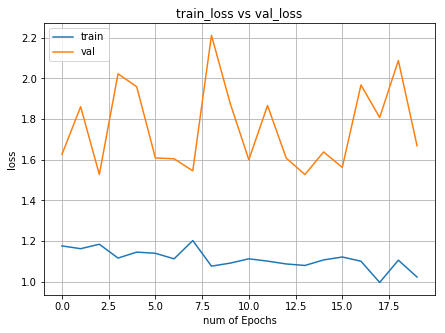

In [388]:
plt.figure(1,figsize=(7,5))
plt.plot(xc,train_loss)
plt.plot(xc,val_loss)
plt.xlabel('num of Epochs')
plt.ylabel('loss')
plt.title('train_loss vs val_loss')
plt.grid(True)
plt.legend(['train','val'])
#print plt.style.available # use bmh, classic,ggplot for big pictures
plt.style.use(['classic'])

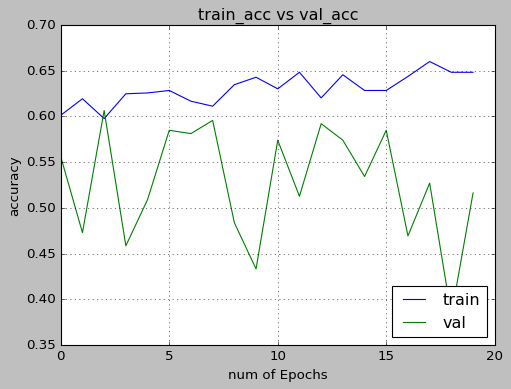

In [389]:
plt.figure(2,figsize=(7,5))
plt.plot(xc,train_acc)
plt.plot(xc,val_acc)
plt.xlabel('num of Epochs')
plt.ylabel('accuracy')
plt.title('train_acc vs val_acc')
plt.grid(True)
plt.legend(['train','val'],loc=4)
#print plt.style.available # use bmh, classic,ggplot for big pictures
plt.style.use(['classic'])

In [398]:
# Evaluating the model

#score = model.evaluate(X_test, y_test,verbose=0)
#print('Test Loss:', score[0])
#print('Test accuracy:', score[1])

test_image = X_test[0:1]

#image.load_img(test_image, target_size=(128, 128))

print(model.predict(test_image))
#print(y_test[0:1])

[[ 0.03977872  0.01490023  0.01326201  0.01408558  0.01457149  0.05706471
   0.01985207  0.00062173  0.10477315  0.08430523  0.00685751  0.08936305
   0.02762442  0.00480746  0.0535375   0.1246906   0.10629883  0.00363852
   0.00083401  0.11783235  0.00631584  0.03103157  0.06395333]]


In [405]:
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])

In [407]:
# Testing a new image
test_image = plt.imread('images/P1_024.jpg')
test_image=rgb2gray(test_image)
test_image=cv2.resize(test_image,(128,128))
test_image = np.array(test_image)
test_image = test_image.astype('float32')
test_image /= 255
print (test_image.shape)
   
if num_channel==1:
    if K.image_dim_ordering()=='th':
        test_image= np.expand_dims(test_image, axis=0)
        test_image= np.expand_dims(test_image, axis=0)
        print (test_image.shape)
    else:
        test_image= np.expand_dims(test_image, axis=3) 
        test_image= np.expand_dims(test_image, axis=0)
        print (test_image.shape)

else:
    if K.image_dim_ordering()=='th':
        test_image=np.rollaxis(test_image,2,0)
        test_image= np.expand_dims(test_image, axis=0)
        print (test_image.shape)
    else:
        test_image= np.expand_dims(test_image, axis=0)
print (test_image.shape)

(128, 128)
(1, 1, 128, 128)
(1, 1, 128, 128)


In [443]:
# Predicting the test image
print((model.predict(test_image)))
print(names[model.predict_classes(test_image)[0]])


[[ 0.42  0.01  0.07  0.04  0.03  0.    0.01  0.02  0.04  0.01  0.06  0.02
   0.06  0.01  0.    0.03  0.05  0.01  0.05  0.01  0.02  0.    0.04]]
1/1 [==============================] - 0s
Plant-1


(1, 1, 32, 126, 126)
(32, 126, 126)
(126, 126, 32)


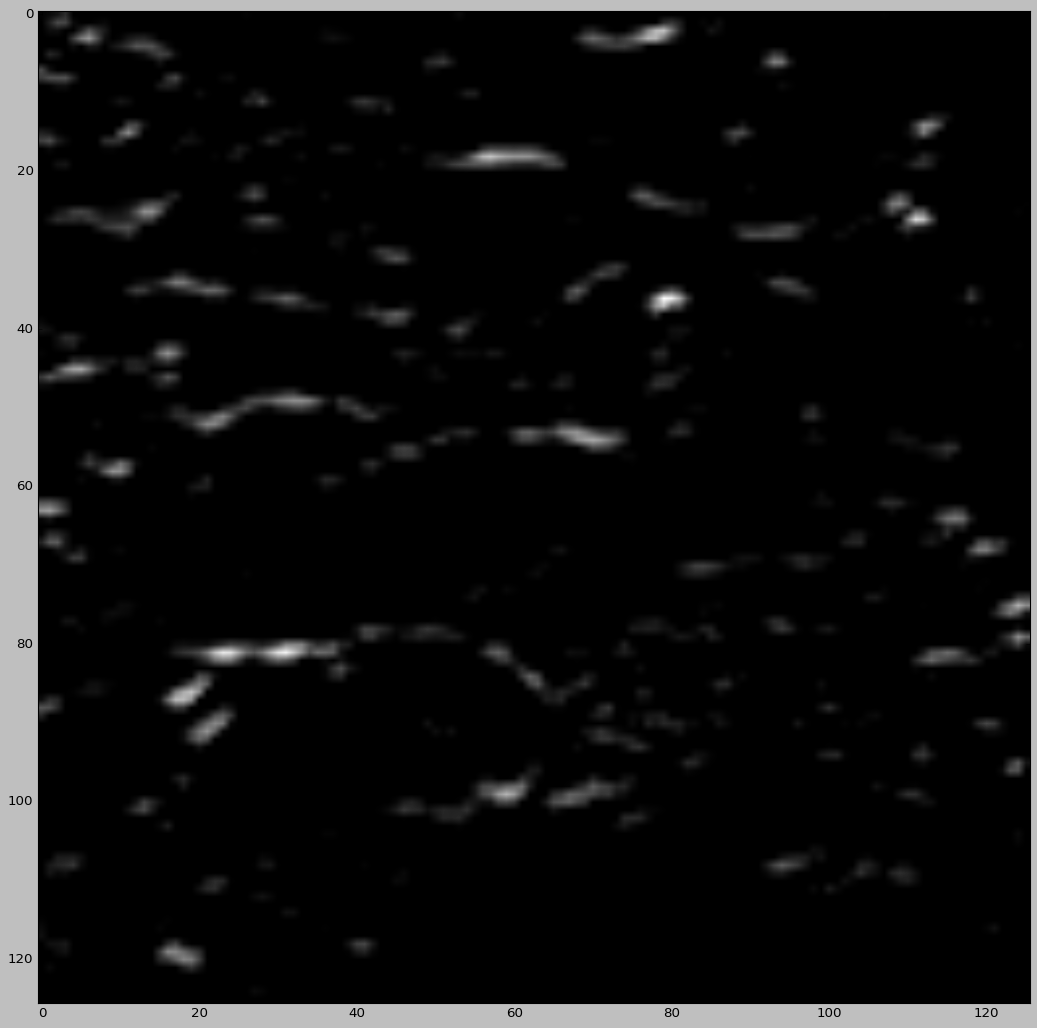

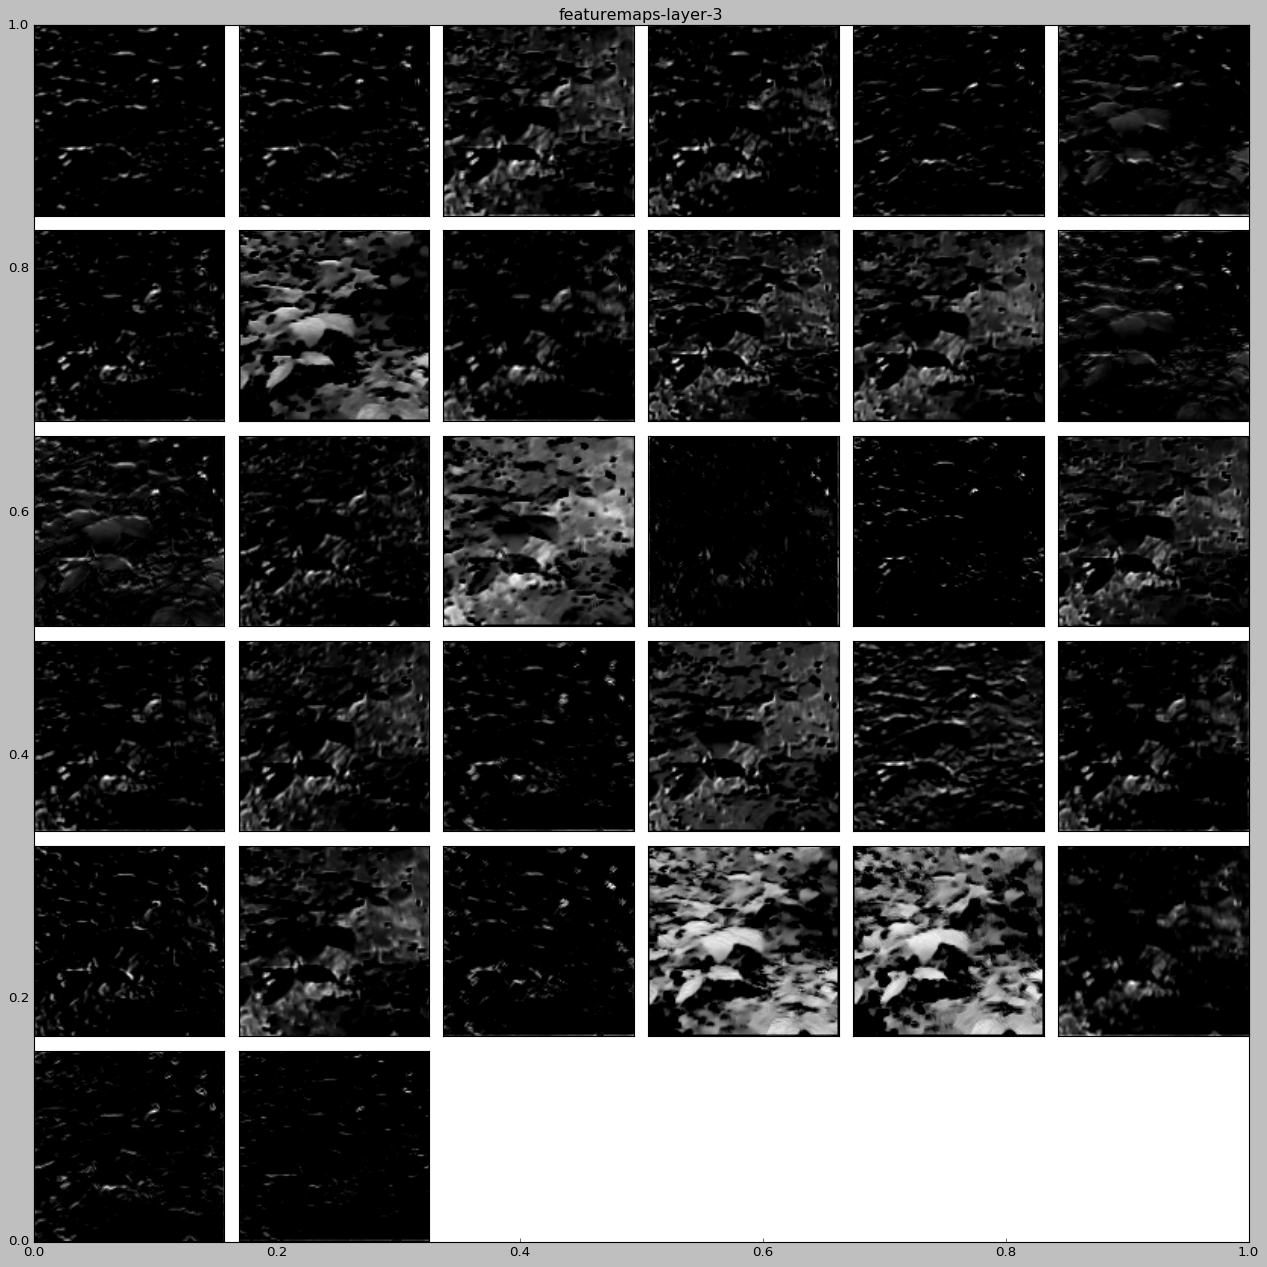

In [412]:
# Visualizing the intermediate layer

def get_featuremaps(model, layer_idx, X_batch):
    get_activations = K.function([model.layers[0].input, K.learning_phase()],[model.layers[layer_idx].output,])
    activations = get_activations([X_batch,0])
    return activations

layer_num=3
filter_num=0

activations = get_featuremaps(model, int(layer_num),test_image)

print (np.shape(activations))
feature_maps = activations[0][0]      
print (np.shape(feature_maps))

if K.image_dim_ordering()=='th':
    feature_maps=np.rollaxis((np.rollaxis(feature_maps,2,0)),2,0)
print (feature_maps.shape)

fig=plt.figure(figsize=(16,16))
plt.imshow(feature_maps[:,:,filter_num],cmap='gray')
plt.savefig("featuremaps-layer-{}".format(layer_num) + "-filternum-{}".format(filter_num)+'.jpg')

num_of_featuremaps=feature_maps.shape[2]
fig=plt.figure(figsize=(16,16))	
plt.title("featuremaps-layer-{}".format(layer_num))
subplot_num=int(np.ceil(np.sqrt(num_of_featuremaps)))
for i in range(int(num_of_featuremaps)):
    ax = fig.add_subplot(subplot_num, subplot_num, i+1)
    #ax.imshow(output_image[0,:,:,i],interpolation='nearest' ) #to see the first filter
    ax.imshow(feature_maps[:,:,i],cmap='gray')
    plt.xticks([])
    plt.yticks([])
    plt.tight_layout()
plt.show()
fig.savefig("featuremaps-layer- {}".format(layer_num) + '.jpg')

In [414]:
# Printing the confusion matrix
from sklearn.metrics import classification_report,confusion_matrix
import itertools

Y_pred = model.predict(X_test)
print(Y_pred)
y_pred = np.argmax(Y_pred, axis=1)
print(y_pred)
#y_pred = model.predict_classes(X_test)
#print(y_pred)
target_names = data_dir_list
print(classification_report(np.argmax(y_test,axis=1), y_pred,target_names=target_names))

print(confusion_matrix(np.argmax(y_test,axis=1), y_pred))


[[  3.97787243e-02   1.49002774e-02   1.32620186e-02 ...,   6.31583482e-03
    3.10315583e-02   6.39533475e-02]
 [  1.16907887e-03   4.59380774e-03   6.27362169e-04 ...,   7.33715657e-04
    5.26640390e-04   1.31209986e-03]
 [  4.66551923e-04   1.47803302e-03   2.20476231e-03 ...,   6.02801971e-04
    5.32089593e-03   3.22118471e-03]
 ..., 
 [  2.27587479e-05   2.46218107e-12   5.01156537e-05 ...,   9.96722162e-01
    2.01483097e-09   5.92835079e-08]
 [  4.14885383e-11   2.68717427e-12   1.26798186e-05 ...,   3.72933937e-06
    1.84775918e-14   3.94819594e-10]
 [  6.12344965e-02   2.88525620e-03   8.20932686e-02 ...,   3.00797243e-02
    7.74668381e-02   7.42457286e-02]]
[15 11 16  3 22 22  6  8  4  3 17  1  3 16 14 12 10  3  2 13 21 17 20 22  3
  6  3 13 22  8  2  6 10 12 13 13 15 18  1 18  4 17 13 22  8 22 16 16 18 22
 20 22 16 19 17 17 22  2 18  8 20 17  4 22  4 13  8 11 16  5 17 19 16 13 13
 18 16 17 20 19 13 22 17 16 11 13  2 22 16  2 20 22 20  1  6 18 21 13 20 16
 15  3 21 20 22 

C:\Users\Kushagra\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


             precision    recall  f1-score   support

    Plant-1       0.00      0.00      0.00         4
   Plant-10       0.45      0.42      0.43        12
   Plant-11       0.54      0.37      0.44        19
   Plant-12       0.15      0.29      0.20         7
   Plant-13       0.33      0.50      0.40        10
   Plant-14       0.50      0.25      0.33        12
   Plant-15       0.67      0.33      0.44        12
   Plant-16       0.00      0.00      0.00         6
   Plant-17       0.29      0.44      0.35         9
   Plant-18       0.25      0.17      0.20         6
   Plant-19       0.33      0.25      0.29         8
    Plant-2       0.64      0.41      0.50        17
   Plant-20       0.50      0.17      0.25         6
   Plant-22       0.62      0.82      0.71        22
   Plant-23       0.40      0.33      0.36         6
   Plant-24       0.75      0.60      0.67        10
    Plant-3       0.80      0.73      0.76        22
    Plant-4       0.65      0.72      0.68   

Confusion matrix, without normalization
[[ 0  1  1  1  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  5  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  6]
 [ 0  1  7  1  2  0  0  0  1  0  0  1  1  0  0  0  0  0  0  2  1  0  2]
 [ 0  0  1  2  1  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  2]
 [ 0  0  1  0  5  0  0  0  1  1  0  0  0  1  0  0  0  0  0  0  0  1  0]
 [ 0  1  0  0  0  3  0  0  0  0  1  1  0  3  0  0  1  0  0  0  0  0  2]
 [ 0  0  0  0  0  0  4  0  0  0  0  0  0  3  0  0  0  4  1  0  0  0  0]
 [ 0  0  0  4  1  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  1  0  0  0  0  4  0  0  0  0  0  0  0  0  0  0  1  0  1  2]
 [ 0  0  2  0  0  0  0  0  1  1  0  0  0  0  0  0  0  0  0  0  0  0  2]
 [ 0  0  0  0  0  0  0  0  2  0  2  0  0  1  0  0  0  0  0  0  0  0  3]
 [ 0  1  0  0  0  1  0  0  0  0  0  7  0  1  1  0  2  0  0  0  3  0  1]
 [ 0  0  0  3  0  0  0  0  0  0  0  0  1  0  0  0  0  1  0  0  0  0  1]
 [ 0  0  0  0  1  0  0  

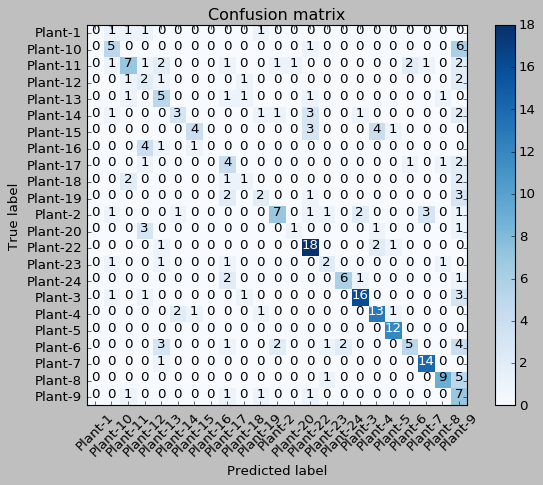

In [416]:
# Plotting the confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = (confusion_matrix(np.argmax(y_test,axis=1), y_pred))

np.set_printoptions(precision=2)

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=target_names,
                      title='Confusion matrix')

plt.show()


In [417]:
# Saving and loading model and weights
from keras.models import model_from_json
from keras.models import load_model

# serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")

# load json and create model
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model.h5")
print("Loaded model from disk")

model.save('model.hdf5')
loaded_model=load_model('model.hdf5')

Saved model to disk
Loaded model from disk


In [466]:
def load_image(path_to_file):
    im = image.load_img(path_to_file, target_size =(128,128))
    plt.imshow(im)

# Prediction Function

In [462]:
def predict_plant(path_to_file):
    test_image = plt.imread(path_to_file)
    test_image=rgb2gray(test_image)
    test_image=cv2.resize(test_image,(128,128))
    test_image = np.array(test_image)
    test_image = test_image.astype('float32')
    test_image /= 255
    
   
    if num_channel==1:
        if K.image_dim_ordering()=='th':
            test_image= np.expand_dims(test_image, axis=0)
            test_image= np.expand_dims(test_image, axis=0)
        else:
            test_image= np.expand_dims(test_image, axis=3) 
            test_image= np.expand_dims(test_image, axis=0)

    else:
        if K.image_dim_ordering()=='th':
            test_image=np.rollaxis(test_image,2,0)
            test_image= np.expand_dims(test_image, axis=0)
        else:
            test_image= np.expand_dims(test_image, axis=0)
    print((model.predict(test_image)))
    print(names[model.predict_classes(test_image)[0]])

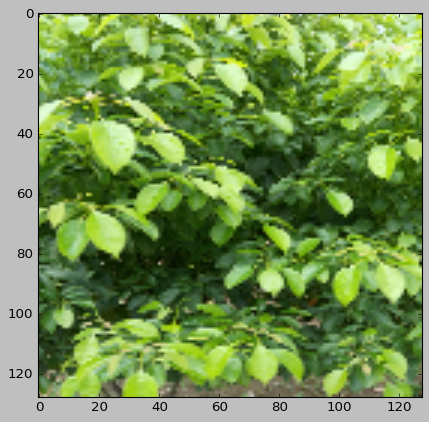

In [469]:
path_to_file = 'images/P22_024.jpg'
load_image(path_to_file)

In [470]:
predict_plant(path_to_file)

[[  5.01e-07   3.15e-03   2.41e-04   1.40e-03   1.64e-03   2.59e-03
    6.09e-04   4.02e-08   1.12e-04   8.90e-07   1.62e-02   1.23e-05
    2.37e-07   9.64e-01   7.13e-07   4.04e-06   3.80e-07   5.44e-03
    3.31e-05   5.55e-07   3.51e-06   9.99e-05   4.73e-03]]
1/1 [==============================] - 0s
Plant-22
